In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy.optimize import linprog

In [3]:
objective = [7, 4, 6, 1]

inequality_matrix = [[1, 2, -1, -1], [-1, -5, 2, 3]]

inequality_vector = [1, 1]

result = linprog(objective, A_eq=inequality_matrix, b_eq=inequality_vector)

In [4]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 15.0
              x: [ 2.000e+00  0.000e+00  0.000e+00  1.000e+00]
            nit: 3
          lower:  residual: [ 2.000e+00  0.000e+00  0.000e+00  1.000e+00]
                 marginals: [ 0.000e+00  2.000e+00  9.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [ 1.100e+01  4.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [134]:
n_list = [4, 10, 20, 30, 40, 50, 60, 70, 80]
m_list = [2, 6, 10, 14, 18, 22]

results =[]
run_num = 0

for n in n_list:
    for m in m_list:
        run_num += 1

        inequality_matrix = np.random.randint(-5, 6, size=(m, n))
        inequality_vector = np.random.randint(1, 11, size=m)
        objective = np.random.randint(1, 11, size=n)

        start = time.time()
        result = linprog(objective, A_eq=inequality_matrix, b_eq=inequality_vector, method='highs')
        runtime = time.time() - start

        result_dict = {
            'n': n, 
            'm': m,
            'runtime': runtime,
            'nit': result.nit if result.success else None,
            'optimal_value': result.fun if result.success else None,
            'success': result.success,
            'status': result.status,
            'message': result.message
        }
        results.append(result_dict)

df = pd.DataFrame(results)

df.to_csv('data/simplex_results.csv', index=False)

In [5]:
df = pd.read_csv('data/simplex_results.csv')

In [6]:
successful = df[df['success'] == True].copy()

In [7]:
sns.set_context("talk")          

## Runtime by n

In [8]:
runtime_by_n = successful.groupby('n')['runtime'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_n)

        mean       std       min       max
n                                         
4   0.000868       NaN  0.000868  0.000868
10  0.001053  0.000474  0.000719  0.001388
20  0.000918  0.000131  0.000767  0.001008
30  0.000759  0.000077  0.000671  0.000849
40  0.000853  0.000134  0.000698  0.001028
50  0.000890  0.000116  0.000769  0.001056
60  0.000931  0.000169  0.000727  0.001177
70  0.000939  0.000156  0.000773  0.001131
80  0.001094  0.000222  0.000879  0.001511


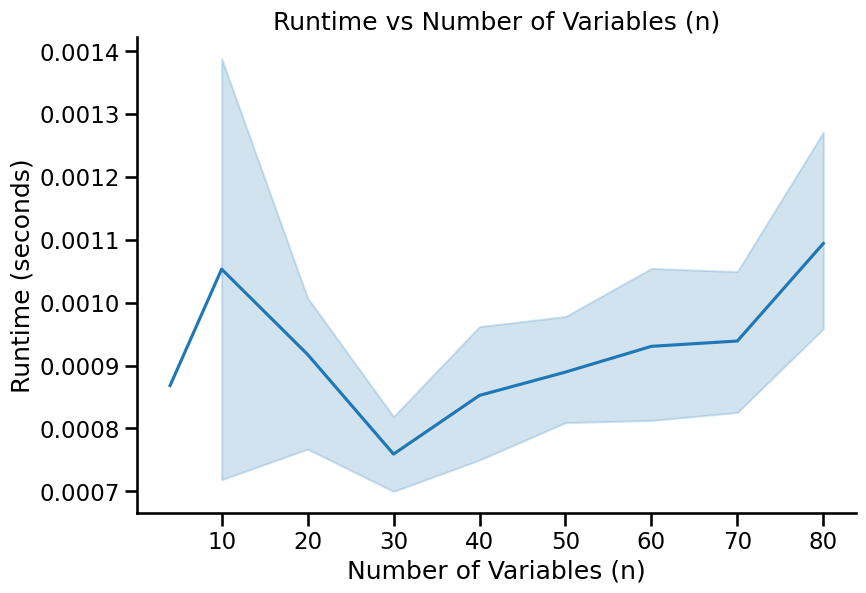

In [9]:
sns.relplot(
    data=successful,
    x="n",
    y="runtime",
    kind="line",
    height=6,
    aspect=1.5,
)

plt.title("Runtime vs Number of Variables (n)")
plt.xlabel("Number of Variables (n)")
plt.ylabel("Runtime (seconds)")
plt.show()

## Runtime by m

In [10]:
runtime_by_m = successful.groupby('m')['runtime'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_m)

        mean       std       min       max
m                                         
2   0.000895  0.000197  0.000757  0.001388
6   0.000783  0.000134  0.000671  0.001096
10  0.000873  0.000087  0.000728  0.001008
14  0.000936  0.000100  0.000830  0.001082
18  0.001064  0.000094  0.000941  0.001177
22  0.001195  0.000213  0.001056  0.001511


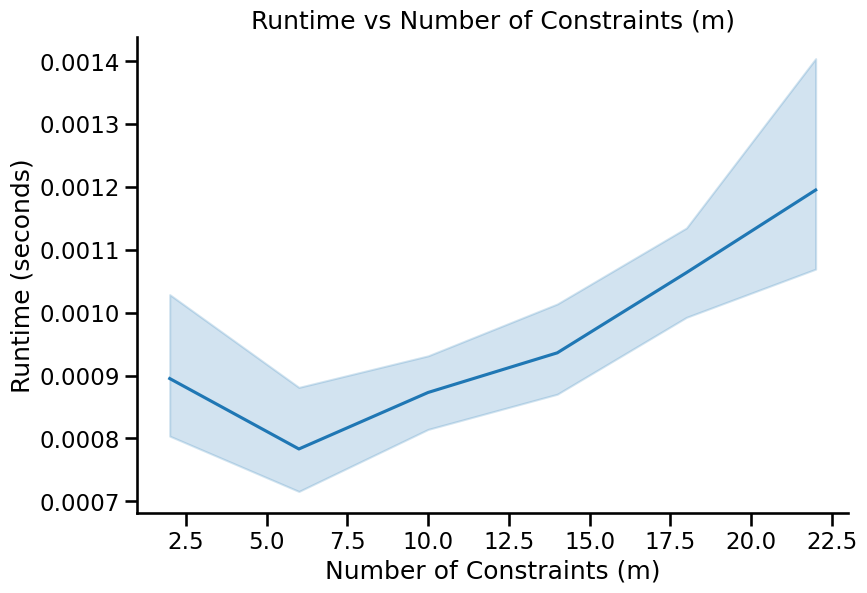

In [11]:
sns.relplot(
    data=successful,
    x="m",
    y="runtime",
    kind="line",
    height=6,
    aspect=1.5,
)

plt.title("Runtime vs Number of Constraints (m)")
plt.xlabel("Number of Constraints (m)")
plt.ylabel("Runtime (seconds)")
plt.show()

## Iterations by n

In [12]:
iterations_by_n = successful.groupby('n')['nit'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_n)

        mean       std       min       max
n                                         
4   0.000868       NaN  0.000868  0.000868
10  0.001053  0.000474  0.000719  0.001388
20  0.000918  0.000131  0.000767  0.001008
30  0.000759  0.000077  0.000671  0.000849
40  0.000853  0.000134  0.000698  0.001028
50  0.000890  0.000116  0.000769  0.001056
60  0.000931  0.000169  0.000727  0.001177
70  0.000939  0.000156  0.000773  0.001131
80  0.001094  0.000222  0.000879  0.001511


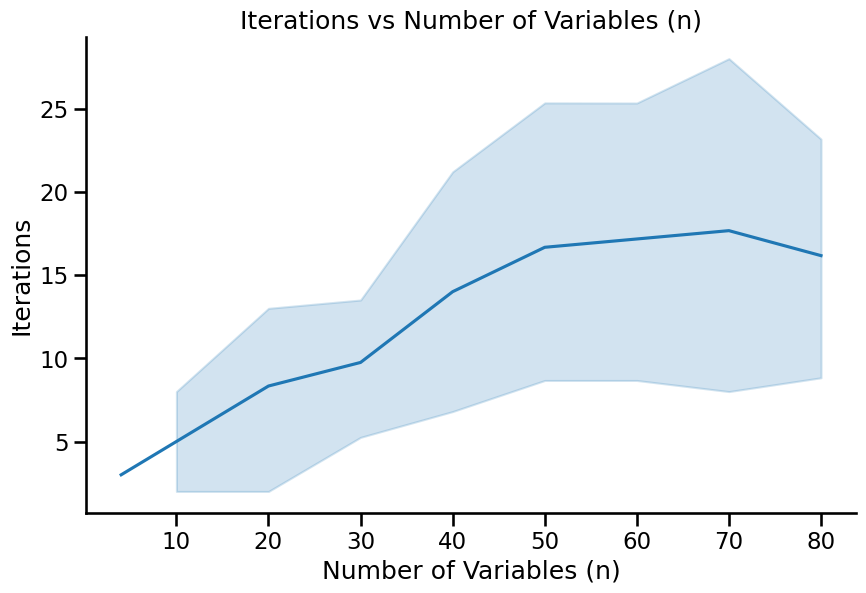

In [14]:
sns.relplot(
    data=successful,
    x="n",
    y="nit",
    kind="line",
    height=6,
    aspect=1.5,
)

plt.title("Iterations vs Number of Variables (n)")
plt.xlabel("Number of Variables (n)")
plt.ylabel("Iterations")
plt.show()

In [15]:
iterations_by_m = successful.groupby('m')['nit'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_m)

        mean       std       min       max
m                                         
2   0.000895  0.000197  0.000757  0.001388
6   0.000783  0.000134  0.000671  0.001096
10  0.000873  0.000087  0.000728  0.001008
14  0.000936  0.000100  0.000830  0.001082
18  0.001064  0.000094  0.000941  0.001177
22  0.001195  0.000213  0.001056  0.001511


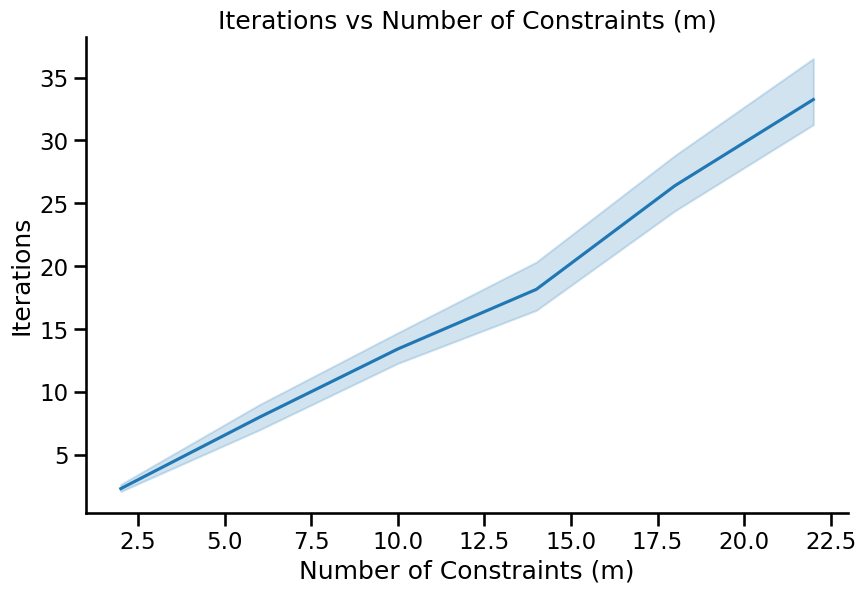

In [16]:
sns.relplot(
    data=successful,
    x="m",
    y="nit",
    kind="line",
    height=6,
    aspect=1.5,
)

plt.title("Iterations vs Number of Constraints (m)")
plt.xlabel("Number of Constraints (m)")
plt.ylabel("Iterations")
plt.show()

In [17]:
feasibility_data = df.pivot_table(index='m', columns='n', values='success')

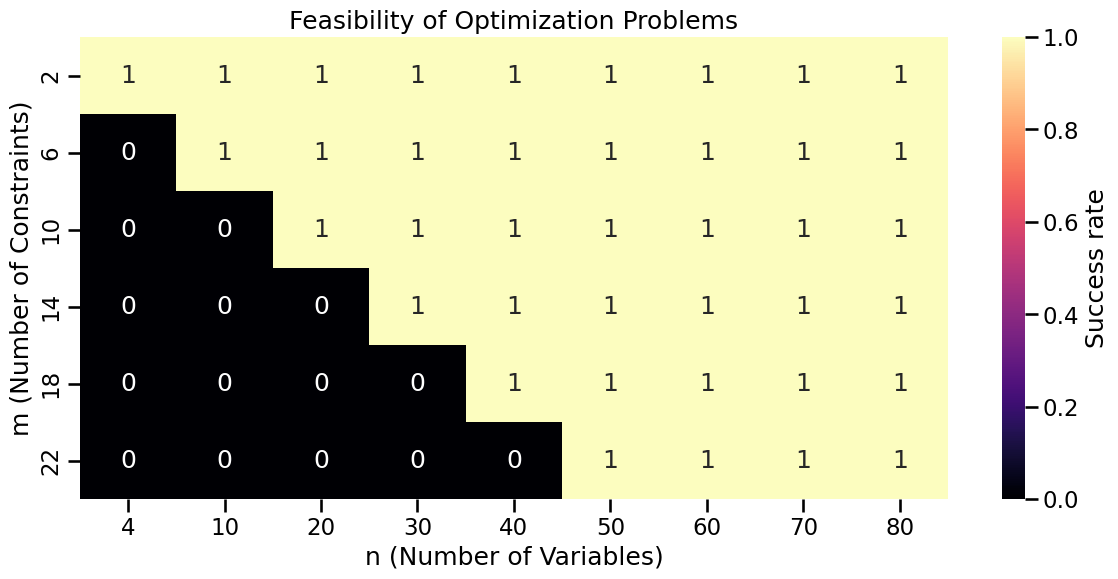

In [18]:
plt.figure(figsize=(14, 6)) 
sns.heatmap(    
    feasibility_data,
    annot=True,
    cmap="magma",
    cbar_kws={'label': 'Success rate'})

plt.title("Feasibility of Optimization Problems")
plt.xlabel("n (Number of Variables)")
plt.ylabel("m (Number of Constraints)")
plt.show()

In [19]:
iterations_data = df.pivot_table(index='m', columns='n', values='nit')

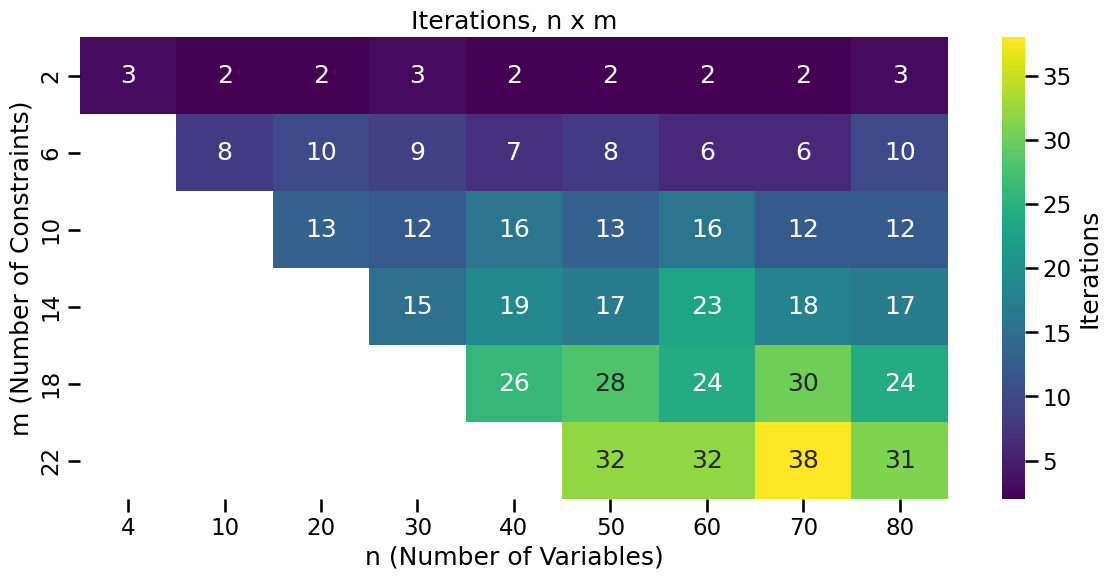

In [20]:
plt.figure(figsize=(14, 6)) 
sns.heatmap(    
    iterations_data,
    annot=True,
    cmap="viridis",
    cbar_kws={'label': 'Iterations'})

plt.title("Iterations, n x m")
plt.xlabel("n (Number of Variables)")
plt.ylabel("m (Number of Constraints)")
plt.show()

In [22]:
runtime_data = df.pivot_table(index='m', columns='n', values='runtime')

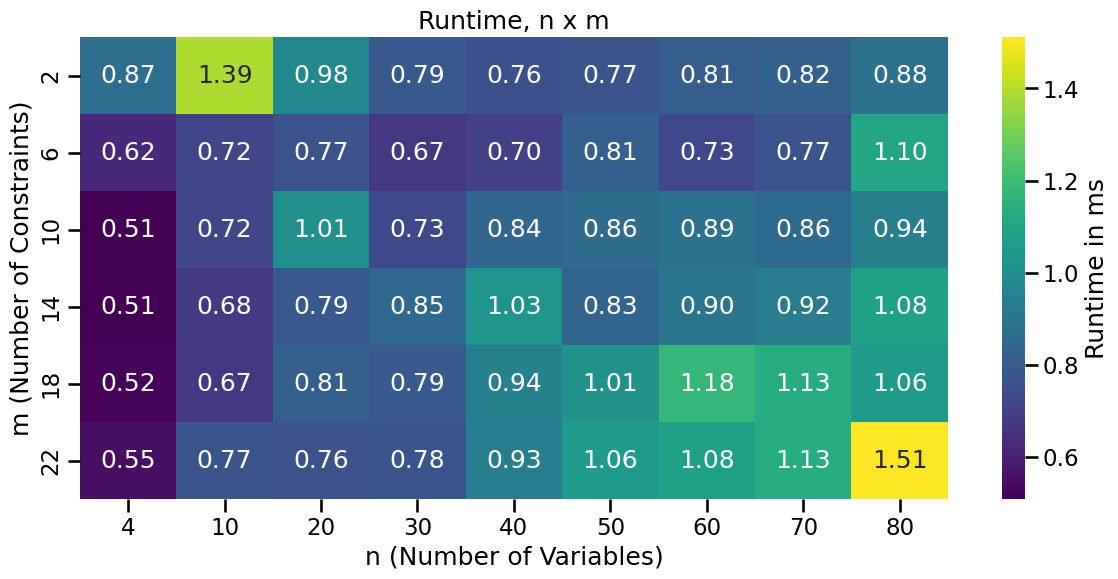

In [23]:
plt.figure(figsize=(14, 6)) 
sns.heatmap(    
    runtime_data * 1000,
    annot=True,
    fmt = '.2f',
    cmap="viridis",
    cbar_kws={'label': 'Runtime in ms'})

plt.title("Runtime, n x m")
plt.xlabel("n (Number of Variables)")
plt.ylabel("m (Number of Constraints)")
plt.show()